In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [58]:
hdb_train = pd.read_csv('../datasets/train.csv', low_memory= False)


In [60]:
hdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [62]:
for name, dtype in hdb_train.dtypes.items():
    print(name, dtype)

id int64
Tranc_YearMonth object
town object
flat_type object
block object
street_name object
storey_range object
floor_area_sqm float64
flat_model object
lease_commence_date int64
resale_price float64
Tranc_Year int64
Tranc_Month int64
mid_storey int64
lower int64
upper int64
mid int64
full_flat_type object
address object
floor_area_sqft float64
price_per_sqft float64
hdb_age int64
max_floor_lvl int64
year_completed int64
residential object
commercial object
market_hawker object
multistorey_carpark object
precinct_pavilion object
total_dwelling_units int64
1room_sold int64
2room_sold int64
3room_sold int64
4room_sold int64
5room_sold int64
exec_sold int64
multigen_sold int64
studio_apartment_sold int64
1room_rental int64
2room_rental int64
3room_rental int64
other_room_rental int64
postal object
Latitude float64
Longitude float64
planning_area object
Mall_Nearest_Distance float64
Mall_Within_500m float64
Mall_Within_1km float64
Mall_Within_2km float64
Hawker_Nearest_Distance float64
Ha

In [63]:
#categorical columns
X1=['Tranc_YearMonth','town','flat_type','block','street_name','storey_range','flat_model','full_flat_type',
     'address','residential','commercial','market_hawker','multistorey_carpark','precinct_pavilion','postal',
      'planning_area','mrt_name','bus_stop_name','pri_sch_name','sec_sch_name']


In [64]:
#numeric columns exclusing id and resale price
X2 = ['floor_area_sqm','lease_commence_date','Tranc_Year','Tranc_Month','mid_storey','lower','upper',
      'mid_storey','floor_area_sqft','price_per_sqft','hdb_age','max_floor_lvl','year_completed','total_dwelling_units',
      '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold','exec_sold','multigen_sold','studio_apartment_sold',
      '1room_rental','2room_rental','3room_rental','other_room_rental','Latitude','Longitude','Mall_Nearest_Distance',
      'Mall_Within_500m','Mall_Within_1km','Mall_Within_2km','Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km',
      'Hawker_Within_2km','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance','bus_interchange',
      'mrt_interchange','mrt_latitude','mrt_longitude','bus_stop_nearest_distance','bus_stop_latitude','bus_stop_longitude',
      'pri_sch_nearest_distance','vacancy','pri_sch_affiliation','pri_sch_latitude','pri_sch_longitude','sec_sch_nearest_dist',
      'cutoff_point','affiliation','sec_sch_latitude','sec_sch_longitude']

In [65]:
hdb_train[X2].corr()

,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid_storey,floor_area_sqft,price_per_sqft,...,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
floor_area_sqm,1.000000,0.283182,0.021400,0.003735,0.023855,0.023851,0.023832,0.023855,1.000000,-0.183124,...,-0.113645,-0.029813,-0.042265,0.217131,-0.009764,-0.063315,-0.077721,-0.083810,0.213272,-0.009090
lease_commence_date,0.283182,1.000000,0.204991,-0.000737,0.265112,0.266333,0.263584,0.265112,0.283182,0.174912,...,-0.181359,0.167118,-0.119898,0.366473,-0.009005,-0.070921,-0.060264,-0.091333,0.356244,-0.006985
Tranc_Year,0.021400,0.204991,1.000000,-0.084507,0.074611,0.085297,0.063824,0.074611,0.021400,-0.066201,...,0.006279,0.021354,-0.008453,0.030451,0.028764,0.014228,0.017313,0.000565,0.026951,0.029235
Tranc_Month,0.003735,-0.000737,-0.084507,1.000000,-0.002193,0.002920,-0.007311,-0.002193,0.003735,-0.012897,...,-0.001961,0.003409,-0.003502,0.002370,0.002070,-0.004701,-0.003391,-0.002006,0.003021,0.001979
mid_storey,0.023855,0.265112,0.074611,-0.002193,1.000000,0.999423,0.999421,1.000000,0.023855,0.437975,...,0.016034,0.080250,-0.017630,-0.109133,-0.036845,0.065021,0.050214,0.010656,-0.108582,-0.036176
lower,0.023851,0.266333,0.085297,0.002920,0.999423,1.000000,0.997688,0.999423,0.023851,0.436808,...,0.016058,0.080395,-0.017651,-0.108819,-0.036370,0.064878,0.050189,0.010657,-0.108296,-0.035696
upper,0.023832,0.263584,0.063824,-0.007311,0.999421,0.997688,1.000000,0.999421,0.023832,0.438638,...,0.015991,0.080013,-0.017589,-0.109320,-0.037278,0.065089,0.050182,0.010644,-0.108744,-0.036615
mid_storey,0.023855,0.265112,0.074611,-0.002193,1.000000,0.999423,0.999421,1.000000,0.023855,0.437975,...,0.016034,0.080250,-0.017630,-0.109133,-0.036845,0.065021,0.050214,0.010656,-0.108582,-0.036176
floor_area_sqft,1.000000,0.283182,0.021400,0.003735,0.023855,0.023851,0.023832,0.023855,1.000000,-0.183124,...,-0.113645,-0.029813,-0.042265,0.217131,-0.009764,-0.063315,-0.077721,-0.083810,0.213272,-0.009090
price_per_sqft,-0.183124,0.174912,-0.066201,-0.012897,0.437975,0.436808,0.438638,0.437975,-0.183124,1.000000,...,0.098350,0.018671,0.070783,-0.510011,0.140042,0.203794,0.126532,0.077871,-0.508331,0.142385


In [66]:
X_3 = ['floor_area_sqm','lease_commence_date','Tranc_Year','Tranc_Month','mid_storey','lower','upper',
      'mid','floor_area_sqft','price_per_sqft','hdb_age','max_floor_lvl','year_completed','total_dwelling_units',
      '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold','exec_sold','multigen_sold','studio_apartment_sold']

In [67]:
X_4 = ['1room_rental','2room_rental','3room_rental','other_room_rental','Latitude','Longitude','Mall_Nearest_Distance',
      'Mall_Within_500m','Mall_Within_1km','Mall_Within_2km','Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km',
      'Hawker_Within_2km','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance','bus_interchange']

In [68]:
X_5 = ['mrt_interchange','mrt_latitude','mrt_longitude','bus_stop_nearest_distance','bus_stop_latitude','bus_stop_longitude',
      'pri_sch_nearest_distance','vacancy','pri_sch_affiliation','pri_sch_latitude','pri_sch_longitude','sec_sch_nearest_dist',
      'cutoff_point','affiliation','sec_sch_latitude','sec_sch_longitude']

In [69]:
df3 = hdb_train[X_3]
df4 = hdb_train[X_4]
df5 = hdb_train[X_5]
print(df3.isnull().sum())
print(df4.isnull().sum())
df5.isnull().sum()

floor_area_sqm           0
lease_commence_date      0
Tranc_Year               0
Tranc_Month              0
mid_storey               0
lower                    0
upper                    0
mid                      0
floor_area_sqft          0
price_per_sqft           0
hdb_age                  0
max_floor_lvl            0
year_completed           0
total_dwelling_units     0
1room_sold               0
2room_sold               0
3room_sold               0
4room_sold               0
5room_sold               0
exec_sold                0
multigen_sold            0
studio_apartment_sold    0
dtype: int64
1room_rental                   0
2room_rental                   0
3room_rental                   0
other_room_rental              0
Latitude                       0
Longitude                      0
Mall_Nearest_Distance        829
Mall_Within_500m           92789
Mall_Within_1km            25426
Mall_Within_2km             1940
Hawker_Nearest_Distance        0
Hawker_Within_500m         973

mrt_interchange              0
mrt_latitude                 0
mrt_longitude                0
bus_stop_nearest_distance    0
bus_stop_latitude            0
bus_stop_longitude           0
pri_sch_nearest_distance     0
vacancy                      0
pri_sch_affiliation          0
pri_sch_latitude             0
pri_sch_longitude            0
sec_sch_nearest_dist         0
cutoff_point                 0
affiliation                  0
sec_sch_latitude             0
sec_sch_longitude            0
dtype: int64

In [70]:
#one of collinear columns with 1.00 or 0.99 are removed.e.g. floor_area_sqm and floor_area_sqft 
#'lower','upper','mid' are removed as collinear with 'mid_storey'
#'1room_sold','2room_sold','3room_sold','multigen_sold','studio_apartment_sold' removed as little correlation with resale price
X_3_1 = ['resale_price','floor_area_sqm','Tranc_Year','mid_storey','hdb_age','max_floor_lvl','total_dwelling_units',
      '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold','exec_sold','multigen_sold','studio_apartment_sold']

In [71]:
X_4_1 = ['resale_price','1room_rental','2room_rental','3room_rental','other_room_rental','Latitude','Longitude','Mall_Nearest_Distance',
      'Mall_Within_500m','Mall_Within_1km','Mall_Within_2km','Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km',
      'Hawker_Within_2km','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance','bus_interchange']

In [72]:
X_5_1 = ['resale_price','mrt_interchange','mrt_latitude','mrt_longitude','bus_stop_nearest_distance','bus_stop_latitude','bus_stop_longitude',
          'pri_sch_nearest_distance','vacancy','pri_sch_affiliation','sec_sch_nearest_dist', 'cutoff_point','affiliation']

In [328]:
#resale_price is added into X_3_1, X_4_1, X_5_1 to pairplot with columns

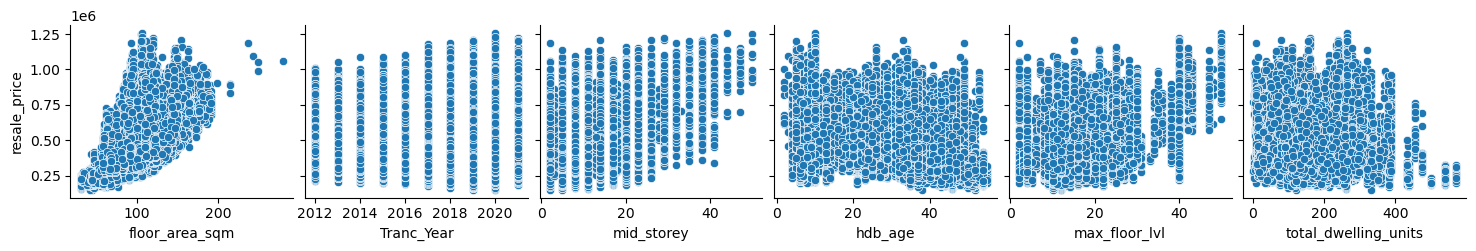

In [73]:
X_3_2 = ['resale_price','floor_area_sqm','Tranc_Year','mid_storey','hdb_age','max_floor_lvl','total_dwelling_units']
sns.pairplot(hdb_train[X_3_2], x_vars=[ 'floor_area_sqm','Tranc_Year','mid_storey','hdb_age','max_floor_lvl','total_dwelling_units'], y_vars=['resale_price'])

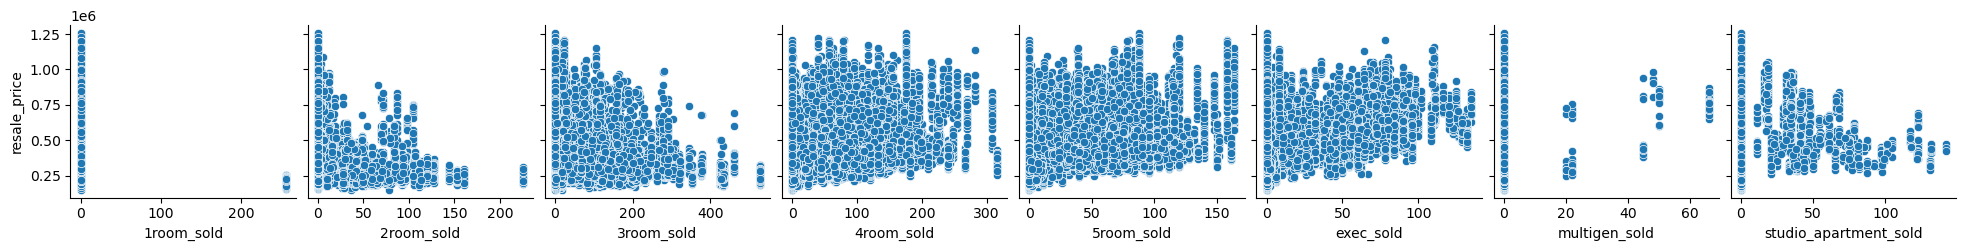

In [15]:
X_3_3 = ['resale_price', '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold','exec_sold','multigen_sold','studio_apartment_sold']
sns.pairplot(hdb_train[X_3_3], x_vars=[ '1room_sold','2room_sold','3room_sold','4room_sold','5room_sold','exec_sold','multigen_sold','studio_apartment_sold'], y_vars=['resale_price'])

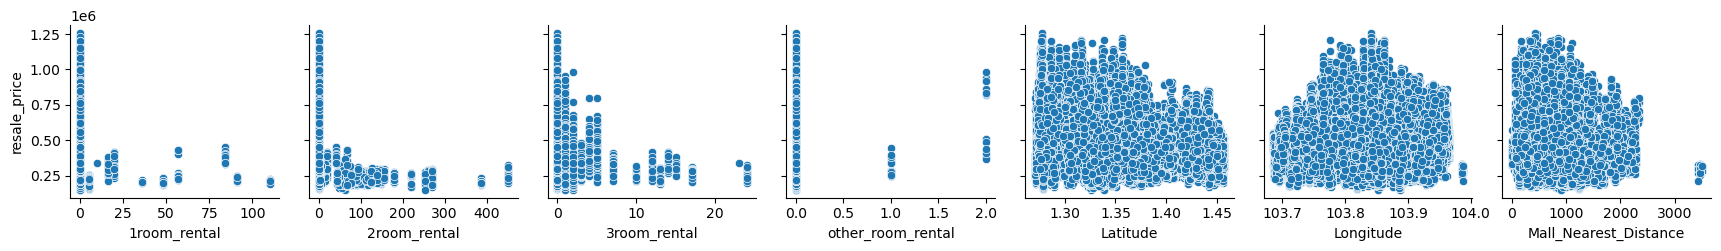

In [16]:
#'1room_rental','2room_rental','3room_rental','other_room_rental' are removed as low correlation with resale price
X_4_2 = ['resale_price','1room_rental','2room_rental','3room_rental','other_room_rental','Latitude','Longitude','Mall_Nearest_Distance']

sns.pairplot(hdb_train[X_4_2], x_vars=[ '1room_rental','2room_rental','3room_rental','other_room_rental','Latitude','Longitude','Mall_Nearest_Distance'], y_vars=['resale_price'])

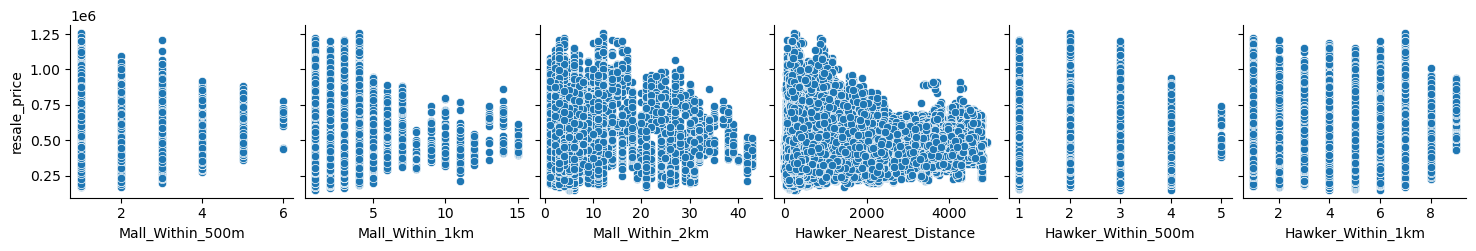

In [17]:
#'Mall_Within_500m','Mall_Within_1km','Hawker_Within_500m','Hawker_Within_1km' are removed
X_4_3 = ['resale_price','Mall_Within_500m','Mall_Within_1km','Mall_Within_2km','Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km']

sns.pairplot(hdb_train[X_4_3], x_vars=['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km','Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km'], y_vars=['resale_price'])

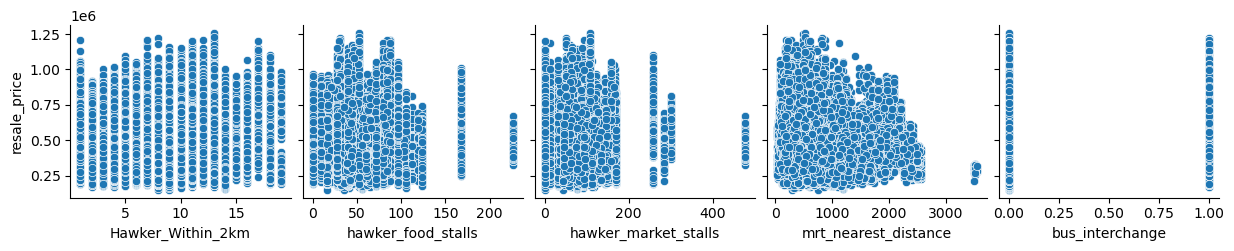

In [27]:
#bus_interchange is removed
X_4_4 =['resale_price', 'Hawker_Within_2km','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance','bus_interchange']

sns.pairplot(hdb_train[X_4_4], x_vars=['Hawker_Within_2km','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance','bus_interchange'], y_vars=['resale_price'])

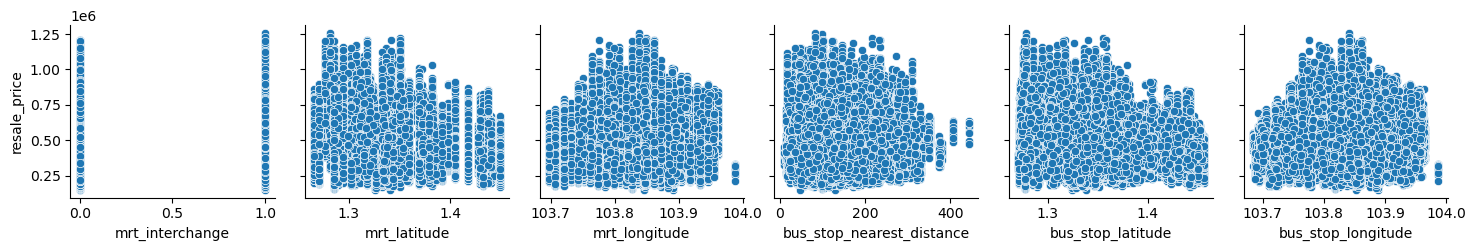

In [20]:
#'mrt_interchange' is removed
X_5_2 = ['resale_price','mrt_interchange','mrt_latitude','mrt_longitude','bus_stop_nearest_distance','bus_stop_latitude','bus_stop_longitude']
          

sns.pairplot(hdb_train[X_5_2], x_vars=['mrt_interchange','mrt_latitude','mrt_longitude','bus_stop_nearest_distance','bus_stop_latitude','bus_stop_longitude'], y_vars=['resale_price'])

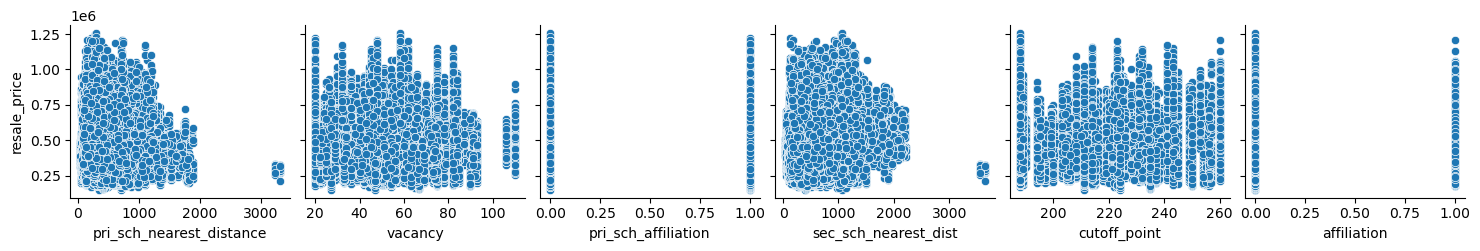

In [21]:
#'pri_sch_affiliation','affiliation' are removed
X_5_3 =['resale_price', 'pri_sch_nearest_distance','vacancy','pri_sch_affiliation','sec_sch_nearest_dist', 'cutoff_point','affiliation']

sns.pairplot(hdb_train[X_5_3], x_vars=['pri_sch_nearest_distance','vacancy','pri_sch_affiliation','sec_sch_nearest_dist', 'cutoff_point','affiliation'], y_vars=['resale_price'])

In [74]:
#'1room_sold','2room_sold','3room_sold','multigen_sold','studio_apartment_sold' removed as little correlation with resale price
#mrt_latitude, mrt_longitude,bus stop latitude and longitude are removed as high correlation with latitude and longitude
Features = ['floor_area_sqft','Tranc_Year','mid_storey','hdb_age','max_floor_lvl','total_dwelling_units','4room_sold','5room_sold','exec_sold',
      'Latitude','Longitude','Mall_Nearest_Distance','Hawker_Nearest_Distance','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance',
      'bus_stop_nearest_distance','pri_sch_nearest_distance','sec_sch_nearest_dist', 'cutoff_point']
#(hdb_train[Features]).corr()
hdb_train[Features].isnull().sum()

floor_area_sqft                0
Tranc_Year                     0
mid_storey                     0
hdb_age                        0
max_floor_lvl                  0
total_dwelling_units           0
4room_sold                     0
5room_sold                     0
exec_sold                      0
Latitude                       0
Longitude                      0
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
hawker_food_stalls             0
hawker_market_stalls           0
mrt_nearest_distance           0
bus_stop_nearest_distance      0
pri_sch_nearest_distance       0
sec_sch_nearest_dist           0
cutoff_point                   0
dtype: int64

In [75]:
hdb_train[Features].isnull().sum()

floor_area_sqft                0
Tranc_Year                     0
mid_storey                     0
hdb_age                        0
max_floor_lvl                  0
total_dwelling_units           0
4room_sold                     0
5room_sold                     0
exec_sold                      0
Latitude                       0
Longitude                      0
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
hawker_food_stalls             0
hawker_market_stalls           0
mrt_nearest_distance           0
bus_stop_nearest_distance      0
pri_sch_nearest_distance       0
sec_sch_nearest_dist           0
cutoff_point                   0
dtype: int64

In [76]:
hdb_train['Mall_Nearest_Distance'].isnull().sum()

829

In [77]:
hdb_train['Mall_Nearest_Distance'] = hdb_train['Mall_Nearest_Distance'].replace('na', np.nan)
hdb_train['Mall_Within_2km'] = hdb_train['Mall_Within_2km'].replace('na', np.nan)
hdb_train['Hawker_Within_2km'] = hdb_train['Hawker_Within_2km'].replace('na', np.nan)

In [78]:
mean_dist = np.mean(hdb_train['Mall_Nearest_Distance'])
mean_dist

664.2398262895447

In [79]:
hdb_train['Mall_Nearest_Distance'] = hdb_train['Mall_Nearest_Distance'].fillna(mean_dist)
hdb_train['Mall_Within_2km'] = hdb_train['Mall_Within_2km'].fillna(0)
hdb_train['Hawker_Within_2km'] = hdb_train['Hawker_Within_2km'].fillna(0)


In [31]:
hdb_train

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,2020-09,WOODLANDS,EXECUTIVE,849,WOODLANDS ST 82,04 TO 06,161.0,Apartment,1995,...,43,0,1.444148,103.794545,189.889876,Evergreen Secondary School,224,0,1.441221,103.793772
150630,147177,2017-06,JURONG WEST,5 ROOM,648D,JURONG WEST ST 61,04 TO 06,110.0,Improved,2001,...,45,0,1.339244,103.698896,614.418470,Boon Lay Secondary School,188,0,1.343224,103.701703
150631,179087,2020-12,BEDOK,EXECUTIVE,639,BEDOK RESERVOIR RD,10 TO 12,144.0,Apartment,1993,...,43,1,1.328471,103.901299,556.889910,Manjusri Secondary School,188,0,1.327520,103.901811
150632,21309,2016-05,QUEENSTOWN,3 ROOM,32,HOLLAND CL,07 TO 09,59.0,Improved,1974,...,82,0,1.299811,103.799965,832.386515,Queensway Secondary School,214,0,1.300475,103.801724


In [80]:
lat = 1.290160
long =  103.852000
print(hdb_train['Latitude'])
print(hdb_train['Longitude'])

0         1.314299
1         1.346086
2         1.343867
3         1.358245
4         1.414745
            ...   
150629    1.441311
150630    1.339430
150631    1.331663
150632    1.306185
150633    1.419583
Name: Latitude, Length: 150634, dtype: float64
0         103.872828
1         103.855078
2         103.760535
3         103.845504
4         103.835532
             ...    
150629    103.792066
150630    103.697684
150631    103.904626
150632    103.796881
150633    103.839961
Name: Longitude, Length: 150634, dtype: float64


In [81]:
hdb_train['lat_diff_sq'] = (hdb_train['Latitude'] - lat)**2
hdb_train['long_diff_sq'] = (hdb_train['Longitude'] - long)**2
print(hdb_train['lat_diff_sq'])

0         0.000583
1         0.003128
2         0.002884
3         0.004636
4         0.015521
            ...   
150629    0.022847
150630    0.002428
150631    0.001723
150632    0.000257
150633    0.016750
Name: lat_diff_sq, Length: 150634, dtype: float64


In [82]:
print(hdb_train['long_diff_sq'])

0         0.000434
1         0.000009
2         0.008366
3         0.000042
4         0.000271
            ...   
150629    0.003592
150630    0.023813
150631    0.002769
150632    0.003038
150633    0.000145
Name: long_diff_sq, Length: 150634, dtype: float64


In [83]:
p = hdb_train['lat_diff_sq']
q = hdb_train['long_diff_sq']

hdb_train['dist'] = (p+q)**(0.5)
print(hdb_train['dist'])

0         0.031882
1         0.056011
2         0.106067
3         0.068394
4         0.125669
            ...   
150629    0.162600
150630    0.161991
150631    0.067022
150632    0.057401
150633    0.129982
Name: dist, Length: 150634, dtype: float64


In [135]:
#checking if feature 'flat_type' affects r2
lr = LabelEncoder()
hdb_train['flat_type'] = lr.fit_transform(hdb_train['flat_type'])

In [85]:
hdb_train['town'] = lr.fit_transform(hdb_train['town'])

In [86]:
hdb_train['street_name'] = lr.fit_transform(hdb_train['street_name'])
#hdb_train['flat_model'] = lr.fit_transform(hdb_train['flat_model'])

In [87]:
hdb_train['flat_times_area'] = hdb_train['flat_type']*hdb_train['floor_area_sqm']

In [136]:
Features= ['floor_area_sqm','Tranc_Year','town','street_name','mid_storey','flat_type','hdb_age','max_floor_lvl','total_dwelling_units','4room_sold','5room_sold','exec_sold',
      'Latitude','Longitude','Mall_Nearest_Distance','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance',
      'bus_stop_nearest_distance','pri_sch_nearest_distance','vacancy','sec_sch_nearest_dist','cutoff_point','dist','flat_times_area']
X = hdb_train[Features]

In [137]:
y = hdb_train['resale_price']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [139]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [140]:
LR_pred = LR.predict(X_test)

In [141]:
R_squared = r2_score( y_test,LR_pred)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.8278450576651923


In [142]:
LR.score(X_train,y_train)

0.8272322141147834

In [143]:
metrics.mean_squared_error(y_test, LR_pred, squared=False)

59168.12278150679

In [144]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train, y_train)
ridge_pred = ridgeRegressor.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(ridge_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.7935137663648377


In [145]:
metrics.mean_squared_error(y_test, ridge_pred, squared=False)

59167.879931313895

In [146]:
lassoRegressor = Lasso()
lassoRegressor.fit(X_train, y_train)
lasso_pred = lassoRegressor.predict(X_test)

# Calculate model performance
# To derive other metrics, check out https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
R_squared = r2_score(lasso_pred, y_test)
print('Test R-squared score :', R_squared)

Test R-squared score : 0.7938345034416565


In [147]:
metrics.mean_squared_error(y_test, lasso_pred, squared=False)

59168.00592509462

In [148]:
LR_pred2 = LR.predict(X)
y[:10], LR_pred2[:10]

(0    680000.0
 1    665000.0
 2    838000.0
 3    550000.0
 4    298000.0
 5    335000.0
 6    433000.0
 7    340000.0
 8    700000.0
 9    490000.0
 Name: resale_price, dtype: float64,
 array([656071.71363623, 617794.12580131, 683166.77285863, 511578.04209913,
        283640.98840647, 363773.61044814, 510010.47179288, 349516.01931974,
        596187.87917439, 509925.89904857]))

In [108]:
hdb_train.head(10)

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,lat_diff_sq,long_diff_sq,dist,flat_times_area
0,88471,2016-05,14,3,3B,476,10 TO 12,90.0,Model A,2006,...,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,0.000583,0.000434,0.031882,270.0
1,122598,2012-07,2,4,153,51,07 TO 09,130.0,Improved,1987,...,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,0.003128,0.000009,0.056011,520.0
2,170897,2013-07,3,5,289B,69,13 TO 15,144.0,Apartment,1997,...,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,0.002884,0.008366,0.106067,720.0
3,86070,2012-04,2,3,232,52,01 TO 05,103.0,Model A,1992,...,389.515528,Catholic High School,253,1,1.354789,103.844934,0.004636,0.000042,0.068394,309.0
4,153632,2017-12,25,3,876,544,01 TO 03,83.0,Simplified,1987,...,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,0.015521,0.000271,0.125669,249.0
5,26610,2013-01,10,2,95,3,07 TO 09,65.0,Improved,1975,...,608.838174,Geylang Methodist School,224,0,1.317659,103.882504,0.000995,0.001169,0.046522,130.0
6,173300,2018-05,11,4,641,200,07 TO 09,120.0,Improved,1987,...,294.826501,Bowen Secondary School,224,0,1.370751,103.877459,0.006580,0.000787,0.085832,480.0
7,55093,2012-03,1,2,701,41,06 TO 10,68.0,New Generation,1980,...,835.014747,Damai Secondary School,188,0,1.337545,103.926417,0.002254,0.004476,0.082042,136.0
8,166738,2020-01,2,4,450,410,10 TO 12,125.0,Improved,1989,...,866.362958,Peirce Secondary School,208,0,1.366132,103.829910,0.004651,0.000467,0.071535,500.0
9,103385,2014-06,20,4,307D,9,10 TO 12,110.0,Improved,2001,...,458.532781,Nan Chiau High School,243,0,1.388687,103.890286,0.010028,0.001190,0.105912,440.0


([<matplotlib.axis.XTick at 0x275036ee610>,
 [Text(0, 0, '1Rm'),
  Text(1, 0, '2Rm'),
  Text(2, 0, '3Rm'),
  Text(3, 0, '4Rm'),
  Text(4, 0, '5Rm'),
  Text(5, 0, 'Executuve'),
  Text(6, 0, 'MultiGen')])

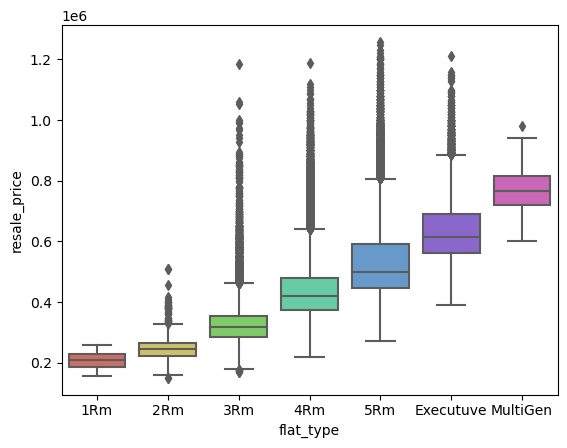

In [111]:
sns.boxplot(x='flat_type', y='resale_price', data=hdb_train, palette='hls')
plt.xticks([0,1, 2, 3,4,5,6], ['1Rm', '2Rm', '3Rm','4Rm','5Rm','Executuve','MultiGen'])

In [110]:
f4 = ['flat_type','floor_area_sqm','flat_model']
hdb_train[f4]

,flat_type,floor_area_sqm,flat_model
0,3,90.0,Model A
1,4,130.0,Improved
2,5,144.0,Apartment
3,3,103.0,Model A
4,3,83.0,Simplified
...,...,...,...
150629,5,161.0,Apartment
150630,4,110.0,Improved
150631,5,144.0,Apartment
150632,2,59.0,Improved


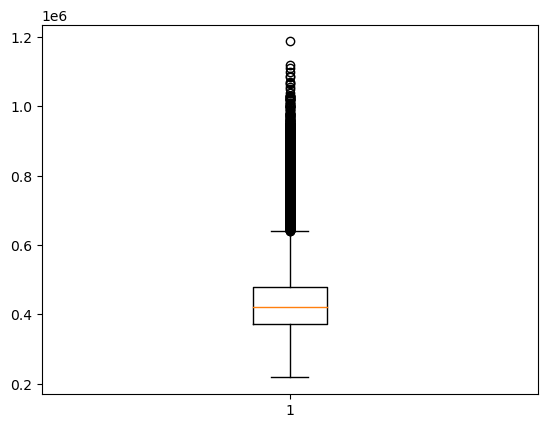

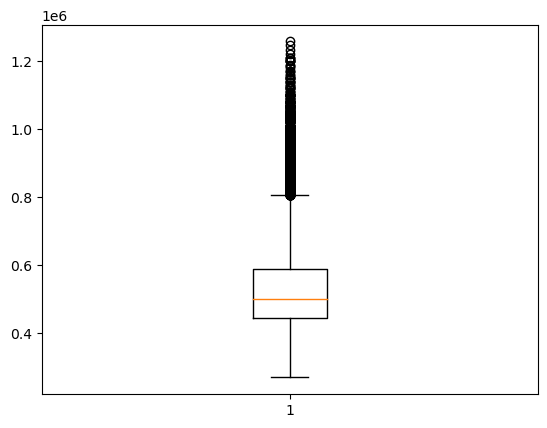

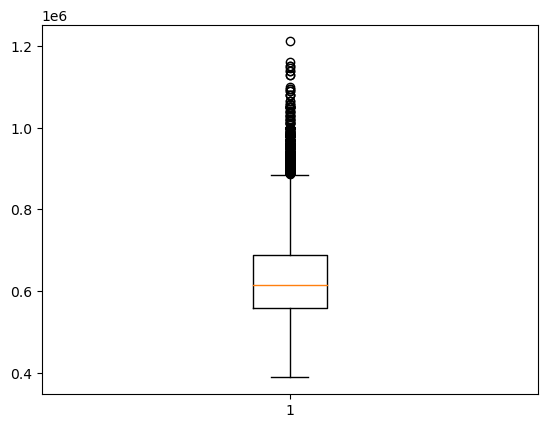

{'whiskers': [<matplotlib.lines.Line2D at 0x2c98731a550>,
 'caps': [<matplotlib.lines.Line2D at 0x2c98731ae10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c987318c90>],
 'medians': [<matplotlib.lines.Line2D at 0x2c98732a010>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c987328790>],
 'means': []}

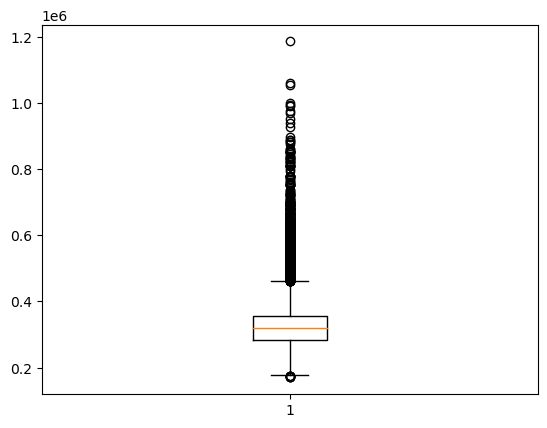

In [56]:
#checking for outlier
lr = LabelEncoder()
hdb_train['flat_type'] = lr.fit_transform(hdb_train['flat_type'])
cat = hdb_train.groupby('flat_type')
hdb_train['flat_type']
#boxplot for 4Room
df4 = cat.get_group(3)['resale_price']
plt.boxplot(df4)
plt.show()
#boxplot for 5Room
df5 = cat.get_group(4)['resale_price']
plt.boxplot(df5)
plt.show()
#boxplot for Executive
df6 = cat.get_group(5)['resale_price'] 
plt.boxplot(df6)
plt.show()
df3 = cat.get_group(2)['resale_price'] 
plt.boxplot(df3)

In [424]:
hdb_train

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,lat_diff_sq,long_diff_sq,dist,flat_times_area
0,28091,2016-05,KALLANG/WHAMPOA,3,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,0.000583,0.000434,0.031882,270.0
1,28091,2012-07,BISHAN,4,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,0.003128,0.000009,0.056011,520.0
2,28091,2013-07,BUKIT BATOK,5,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,0.002884,0.008366,0.106067,720.0
3,28091,2012-04,BISHAN,3,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,389.515528,Catholic High School,253,1,1.354789,103.844934,0.004636,0.000042,0.068394,309.0
4,28091,2017-12,YISHUN,3,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,0.015521,0.000271,0.125669,249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,28091,2020-09,WOODLANDS,5,849,WOODLANDS ST 82,04 TO 06,161.0,Apartment,1995,...,189.889876,Evergreen Secondary School,224,0,1.441221,103.793772,0.022847,0.003592,0.162600,805.0
150630,28091,2017-06,JURONG WEST,4,648D,JURONG WEST ST 61,04 TO 06,110.0,Improved,2001,...,614.418470,Boon Lay Secondary School,188,0,1.343224,103.701703,0.002428,0.023813,0.161991,440.0
150631,28091,2020-12,BEDOK,5,639,BEDOK RESERVOIR RD,10 TO 12,144.0,Apartment,1993,...,556.889910,Manjusri Secondary School,188,0,1.327520,103.901811,0.001723,0.002769,0.067022,720.0
150632,28091,2016-05,QUEENSTOWN,2,32,HOLLAND CL,07 TO 09,59.0,Improved,1974,...,832.386515,Queensway Secondary School,214,0,1.300475,103.801724,0.000257,0.003038,0.057401,118.0


In [425]:
#outlier for 3Room
outlier1=cat.get_group(2)
df=outlier1
bool_array = (df['resale_price']>700000)
subset = df[bool_array]
subset


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,lat_diff_sq,long_diff_sq,dist,flat_times_area
371,28091,2015-03,KALLANG/WHAMPOA,2,53,JLN MA'MOR,01 TO 03,280.0,Terrace,1972,...,678.037848,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001453,0.000017,0.038338,560.0
2633,28091,2014-06,KALLANG/WHAMPOA,2,54,JLN MA'MOR,01 TO 03,88.0,Terrace,1972,...,659.814914,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001451,0.000018,0.038335,176.0
4651,28091,2014-07,KALLANG/WHAMPOA,2,60,JLN BAHAGIA,01 TO 03,103.0,Terrace,1972,...,567.364008,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001429,0.000026,0.038148,206.0
4793,28091,2015-06,QUEENSTOWN,2,50,STIRLING RD,01 TO 03,105.0,Terrace,1968,...,436.219693,Queensway Secondary School,214,0,1.300475,103.801724,0.000049,0.002324,0.048712,210.0
5341,28091,2012-08,KALLANG/WHAMPOA,2,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,...,520.310251,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001447,0.000036,0.038510,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145478,28091,2017-05,KALLANG/WHAMPOA,2,59,JLN MA'MOR,01 TO 03,181.0,Terrace,1972,...,577.917688,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001440,0.000026,0.038294,362.0
145880,28091,2015-12,KALLANG/WHAMPOA,2,59,JLN MA'MOR,01 TO 03,79.0,Terrace,1972,...,577.917688,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001440,0.000026,0.038294,158.0
146078,28091,2016-08,KALLANG/WHAMPOA,2,42,JLN BAHAGIA,01 TO 03,117.0,Terrace,1972,...,527.441050,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001368,0.000025,0.037321,234.0
147206,28091,2012-06,KALLANG/WHAMPOA,2,63,JLN MA'MOR,01 TO 03,108.0,Terrace,1972,...,585.986618,Bendemeer Secondary School,188,0,1.324611,103.860970,0.001475,0.000030,0.038792,216.0


In [438]:
#outlier for 4Room
outlier2=cat.get_group(3)
df=outlier2
bool_array2 = (df['resale_price']>1000000)
subset2 = df[bool_array2]
subset2

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,lat_diff_sq,long_diff_sq,dist,flat_times_area
1016,28091,2019-05,CENTRAL AREA,3,1B,CANTONMENT RD,43 TO 45,93.0,Type S1,2011,...,1069.437452,Outram Secondary School,188,0,1.286387,103.837073,0.000153,0.000112,0.016281,279.0
2143,28091,2019-06,CENTRAL AREA,3,1B,CANTONMENT RD,37 TO 39,95.0,Type S1,2011,...,1069.437452,Outram Secondary School,188,0,1.286387,103.837073,0.000153,0.000112,0.016281,285.0
2424,28091,2020-07,CENTRAL AREA,3,1D,CANTONMENT RD,49 TO 51,94.0,Type S1,2011,...,1161.407915,Outram Secondary School,188,0,1.286387,103.837073,0.000175,0.000111,0.016907,282.0
2629,28091,2018-06,CENTRAL AREA,3,1B,CANTONMENT RD,46 TO 48,96.0,Type S1,2011,...,1069.437452,Outram Secondary School,188,0,1.286387,103.837073,0.000153,0.000112,0.016281,288.0
4298,28091,2020-07,CENTRAL AREA,3,1A,CANTONMENT RD,40 TO 42,95.0,Type S1,2011,...,1044.059590,Outram Secondary School,188,0,1.286387,103.837073,0.000152,0.000122,0.016537,285.0
8559,28091,2020-06,CENTRAL AREA,3,1B,CANTONMENT RD,40 TO 42,93.0,Type S1,2011,...,1069.437452,Outram Secondary School,188,0,1.286387,103.837073,0.000153,0.000112,0.016281,279.0
14139,28091,2020-03,CENTRAL AREA,3,1E,CANTONMENT RD,46 TO 48,96.0,Type S1,2011,...,1176.965115,Outram Secondary School,188,0,1.286387,103.837073,0.000183,0.000118,0.017346,288.0
29102,28091,2019-11,CENTRAL AREA,3,1F,CANTONMENT RD,43 TO 45,95.0,Type S1,2011,...,1243.832892,Outram Secondary School,188,0,1.286387,103.837073,0.000201,0.000117,0.017824,285.0
46672,28091,2019-08,BUKIT MERAH,3,9B,BOON TIONG RD,40 TO 42,92.0,Model A,2016,...,629.643755,Gan Eng Seng School,223,0,1.289071,103.823734,0.000011,0.000532,0.023313,276.0
54552,28091,2020-09,CENTRAL AREA,3,1C,CANTONMENT RD,37 TO 39,95.0,Type S1,2011,...,1117.429936,Outram Secondary School,188,0,1.286387,103.837073,0.000162,0.000107,0.016381,285.0


In [436]:
#outlier for 5Room
outlier3=cat.get_group(4)
df=outlier3
bool_array3 = (df['resale_price']>1000000)
subset3 = df[bool_array3]
subset3

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,lat_diff_sq,long_diff_sq,dist,flat_times_area
2340,28091,2021-03,CENTRAL AREA,4,1G,CANTONMENT RD,37 TO 39,107.0,Type S2,2011,...,1294.270536,Outram Secondary School,188,0,1.286387,103.837073,0.000214,0.000115,0.018138,428.0
2699,28091,2021-02,CLEMENTI,4,311C,CLEMENTI AVE 4,37 TO 39,105.0,DBSS,2014,...,645.042257,Clementi Town Secondary School,231,0,1.315475,103.762079,0.000897,0.007470,0.091467,420.0
3067,28091,2020-02,QUEENSTOWN,4,89,DAWSON RD,34 TO 36,99.0,Premium Apartment,2016,...,264.456161,Queenstown Secondary School,188,0,1.293533,103.813175,0.000028,0.001617,0.040563,396.0
3178,28091,2019-03,KALLANG/WHAMPOA,4,8,BOON KENG RD,34 TO 36,109.0,DBSS,2011,...,912.179897,Bendemeer Secondary School,188,0,1.324611,103.860970,0.000690,0.000090,0.027931,436.0
4723,28091,2020-08,CENTRAL AREA,4,1A,CANTONMENT RD,31 TO 33,107.0,Type S2,2011,...,1044.059590,Outram Secondary School,188,0,1.286387,103.837073,0.000152,0.000122,0.016537,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146578,28091,2018-10,BISHAN,4,275A,BISHAN ST 24,34 TO 36,120.0,DBSS,2011,...,174.144649,Whitley Secondary School,188,0,1.355495,103.842564,0.004432,0.000072,0.067113,480.0
147710,28091,2017-08,QUEENSTOWN,4,50,C'WEALTH DR,28 TO 30,114.0,Improved,2015,...,516.574706,Queensway Secondary School,214,0,1.300475,103.801724,0.000120,0.003011,0.055963,456.0
147819,28091,2019-01,QUEENSTOWN,4,18D,HOLLAND DR,25 TO 27,117.0,Improved,2012,...,1281.231927,Fairfield Methodist School,241,0,1.301921,103.784368,0.000393,0.003528,0.062619,468.0
147872,28091,2017-04,CLEMENTI,4,441A,CLEMENTI AVE 3,37 TO 39,119.0,Improved,2012,...,316.225950,Clementi Town Secondary School,231,0,1.315475,103.762079,0.000599,0.007604,0.090573,476.0


In [429]:
#outlier for Executive
outlier4=cat.get_group(5)
df=outlier4
bool_array4 = (df['resale_price']>1000000)
subset4 = df[bool_array4]
subset4

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,lat_diff_sq,long_diff_sq,dist,flat_times_area
1258,28091,2021-03,BISHAN,5,446,BRIGHT HILL DR,07 TO 09,243.0,Maisonette,1990,...,956.557404,Peirce Secondary School,208,0,1.366132,103.829910,0.004585,3.875425e-04,0.070515,1215.0
2295,28091,2018-11,BISHAN,5,301,SHUNFU RD,07 TO 09,158.0,Maisonette,1985,...,580.520894,Raffles Institution,257,1,1.346281,103.842547,0.003504,1.869427e-04,0.060756,790.0
5288,28091,2017-07,BISHAN,5,190,BISHAN ST 13,19 TO 21,163.0,Maisonette,1987,...,320.355640,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,0.003648,1.980250e-09,0.060395,815.0
6375,28091,2019-12,BISHAN,5,444,SIN MING AVE,22 TO 24,160.0,Maisonette,1990,...,885.335674,Peirce Secondary School,208,0,1.366132,103.829910,0.004676,3.877237e-04,0.071158,800.0
6546,28091,2017-05,BUKIT TIMAH,5,2,TOH YI DR,13 TO 15,146.0,Maisonette,1988,...,1134.818249,Methodist Girls' School,260,1,1.332863,103.783363,0.002402,5.876541e-03,0.090989,730.0
15788,28091,2020-03,QUEENSTOWN,5,148,MEI LING ST,13 TO 15,145.0,Apartment,1995,...,749.658558,Queensway Secondary School,214,0,1.300475,103.801724,0.000017,2.259462e-03,0.047715,725.0
17366,28091,2019-07,QUEENSTOWN,5,148,MEI LING ST,19 TO 21,147.0,Apartment,1995,...,749.658558,Queensway Secondary School,214,0,1.300475,103.801724,0.000017,2.259462e-03,0.047715,735.0
17979,28091,2018-07,QUEENSTOWN,5,148,MEI LING ST,19 TO 21,149.0,Apartment,1995,...,749.658558,Queensway Secondary School,214,0,1.300475,103.801724,0.000017,2.259462e-03,0.047715,745.0
27974,28091,2019-07,QUEENSTOWN,5,148,MEI LING ST,10 TO 12,147.0,Apartment,1995,...,749.658558,Queensway Secondary School,214,0,1.300475,103.801724,0.000017,2.259462e-03,0.047715,735.0
28368,28091,2019-04,BISHAN,5,168,BISHAN ST 13,19 TO 21,163.0,Maisonette,1986,...,320.761992,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,0.003267,4.674676e-06,0.057200,815.0


In [62]:
f1 = ['resale_price','dist']
df1 = hdb_train[f1]
df1.corr()

,resale_price,dist
resale_price,1.000000,-0.250454
dist,-0.250454,1.000000


In [63]:
f2 = ['resale_price','mid_storey']
df2 = hdb_train[f2]
df2.corr()

,resale_price,mid_storey
resale_price,1.000000,0.353213
mid_storey,0.353213,1.000000


In [65]:
#why interaction feature 'flat_times_area' is calculated
f3= ['resale_price','flat_type','floor_area_sqm']
df3 = hdb_train[f3]
df3.corr()

,resale_price,flat_type,floor_area_sqm
resale_price,1.000000,0.662502,0.654120
flat_type,0.662502,1.000000,0.949414
floor_area_sqm,0.654120,0.949414,1.000000


In [134]:
Features_with_resale_price= ['resale_price', 'floor_area_sqm','Tranc_Year','street_name','mid_storey','hdb_age','max_floor_lvl','total_dwelling_units','4room_sold','5room_sold','exec_sold',
      'Latitude','Longitude','Mall_Nearest_Distance','hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance',
      'bus_stop_nearest_distance','pri_sch_nearest_distance','vacancy','sec_sch_nearest_dist','cutoff_point','dist','flat_times_area']

df4 = hdb_train[Features_with_resale_price]
df4.corr().sort_values( ascending = False)

c
#ix= df4.corr().sort_values('resale_price', ascending = False).index

# Create correlation matrix
#corr_mat = df4.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
#sorted_mat = corr_mat.unstack().sort_values(ascending = False)
#sorted_mat

,resale_price,floor_area_sqm,Tranc_Year,street_name,mid_storey,hdb_age,max_floor_lvl,total_dwelling_units,4room_sold,5room_sold,...,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,sec_sch_nearest_dist,cutoff_point,dist,flat_times_area
resale_price,1.000000,0.654120,0.019146,0.024404,0.353213,0.350337,0.495650,0.140725,0.092600,0.359434,...,0.033581,0.009378,0.128222,0.031940,0.011004,0.016140,0.095339,0.034572,0.250454,0.656209
floor_area_sqm,0.654120,1.000000,0.021400,0.103495,0.023855,0.283182,0.073098,0.434511,0.067950,0.391143,...,0.061116,0.206241,0.053186,0.006461,0.113645,0.029813,0.063315,0.077721,0.279596,0.972162
Tranc_Year,0.019146,0.021400,1.000000,0.007466,0.074611,0.204991,0.109416,0.005247,0.046506,0.025932,...,0.027702,0.054191,0.057001,0.003643,0.006279,0.021354,0.014228,0.017313,0.000570,0.023168
street_name,0.024404,0.103495,0.007466,1.000000,0.065154,0.121115,0.120845,0.154759,0.051293,0.001766,...,0.008068,0.304883,0.024996,0.067349,0.013394,0.017398,0.029162,0.127637,0.264139,0.086757
mid_storey,0.353213,0.023855,0.074611,0.065154,1.000000,0.265112,0.556540,0.216576,0.189617,0.215740,...,0.033889,0.021661,0.029442,0.010943,0.016034,0.080250,0.065021,0.050214,0.138130,0.032440
hdb_age,0.350337,0.283182,0.204991,0.121115,0.265112,1.000000,0.458348,0.154468,0.285400,0.332575,...,0.133437,0.373966,0.154657,0.034772,0.181359,0.167118,0.070921,0.060264,0.325606,0.269463
max_floor_lvl,0.495650,0.073098,0.109416,0.120845,0.556540,0.458348,1.000000,0.378220,0.346638,0.399125,...,0.048770,0.047604,0.034034,0.019314,0.032430,0.123097,0.121814,0.091337,0.252390,0.082453
total_dwelling_units,0.140725,0.434511,0.005247,0.154759,0.216576,0.154468,0.378220,1.000000,0.267377,0.029916,...,0.052224,0.255629,0.073669,0.031586,0.140807,0.060162,0.077991,0.100714,0.274587,0.409315
4room_sold,0.092600,0.067950,0.046506,0.051293,0.189617,0.285400,0.346638,0.267377,1.000000,0.051247,...,0.076029,0.010190,0.004485,0.009403,0.037901,0.048748,0.035266,0.010213,0.010366,0.145451
5room_sold,0.359434,0.391143,0.025932,0.001766,0.215740,0.332575,0.399125,0.029916,0.051247,1.000000,...,0.047113,0.104232,0.012518,0.001271,0.071901,0.076568,0.008583,0.006929,0.108892,0.360237


In [ ]:
#Feature Engineering tried but with no effect
hdb_train['dist']**(0.5)
math.log(hdb_train['floor_area_sqm'])
hdb_train['dist']*100